In [ ]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import shap 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [4]:
X = df.drop('left' , axis =1)
y = df['left']


In [5]:
df['salary'].unique()
# since it is inherent(like herirchary) we can use ordinal encoder

array(['low', 'medium', 'high'], dtype=object)

In [6]:
oe = OrdinalEncoder(categories=[['low', 'medium', 'high']], handle_unknown='use_encoded_value' , unknown_value=-1)
X['salary'] = oe.fit_transform(X[['salary']])

In [7]:
X['salary']

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
14994    0.0
14995    0.0
14996    0.0
14997    0.0
14998    0.0
Name: salary, Length: 14999, dtype: float64

In [8]:
le = LabelEncoder()
X['Department'] = le.fit_transform(X['Department'])

In [9]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.25 , random_state=21, stratify=y)

In [11]:
lr = LogisticRegression(random_state=1 , class_weight='balanced' , max_iter = 3000)
lr.fit(X_train , y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=1)

In [12]:
lr.score(X_test , y_test)

0.7552

In [13]:
print(classification_report(y_test , lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      2857
           1       0.49      0.78      0.60       893

    accuracy                           0.76      3750
   macro avg       0.70      0.77      0.71      3750
weighted avg       0.82      0.76      0.77      3750



In [14]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train , y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
dtc.score(X_test , y_test)

0.9770666666666666

In [16]:
print(classification_report(y_test , dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2857
           1       0.94      0.97      0.95       893

    accuracy                           0.98      3750
   macro avg       0.96      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



# Building Explainable AI (Intrepretor AI)

In [17]:
# to see the document here 
# dir(shap)


In [18]:
linear_explainer = shap.LinearExplainer(lr , X_train)
lr_base_value = linear_explainer.expected_value

In [19]:
lr_shap_values = linear_explainer.shap_values(X_test)

In [20]:
X_test.iloc[0]

satisfaction_level         0.52
last_evaluation            0.86
number_project             6.00
average_montly_hours     103.00
time_spend_company         4.00
Work_accident              0.00
promotion_last_5years      0.00
Department                 7.00
salary                     0.00
Name: 6665, dtype: float64

In [21]:
y_test.iloc[0]

0

In [22]:
lr.predict(X_test.iloc[:1])

array([0], dtype=int64)

In [23]:
lr.predict_proba(X_test.iloc[:1])

array([[0.60437587, 0.39562413]])

# local interpretor

In [24]:
lr_shap_values[0]

array([ 0.23667661,  0.16799243, -0.91791514, -0.52664385,  0.21612405,
        0.23642006,  0.01884997,  0.03325331,  0.42327266])

In [25]:
# To visulize local interpretion
shap.initjs()

In [26]:
shap.force_plot(lr_base_value , lr_shap_values[0], X_test.iloc[0], X_test.columns)

In [27]:
lr.predict_proba(X_test.iloc[2:3])

array([[0.26005837, 0.73994163]])

In [28]:
shap.force_plot(lr_base_value , lr_shap_values[2], X_test.iloc[2], X_test.columns)

In [29]:
# intreprete Tree Model 
tree_exp = shap.TreeExplainer(dtc, X_train , feature_names=X_train.columns)
tree_base_value = tree_exp.expected_value[1]
tree_base_value

0.2

In [37]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6665,0.52,0.86,6,103,4,0,0,7,0.0
7909,0.81,0.51,3,247,2,0,0,8,1.0
32,0.40,0.51,2,145,3,0,0,3,0.0
12786,0.59,0.73,2,230,3,0,0,9,0.0
9450,0.67,0.71,4,178,6,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
7063,0.80,0.52,3,182,2,0,0,9,1.0
2834,0.66,0.63,6,223,6,0,0,7,1.0
11709,0.77,0.86,5,238,3,0,0,4,2.0
9346,0.85,0.66,3,235,3,0,0,9,0.0


In [45]:
# below give two array on for shap value for shape value of zero and other for one class
# now if you pick base value for class one (1) the the shap values should be also used for one(1) or vice versa
tree_shap_value =tree_exp.shap_values(X_test)
tree_shap_value = tree_shap_value[:, :, 1]

In [31]:
dtc.predict_proba(X_test.iloc[0:1])

array([[1., 0.]])

In [33]:
X_test.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [46]:
shap.force_plot(tree_base_value , tree_shap_value[0],X_test.iloc[0],X_test.columns)

In [47]:
dtc.predict_proba(X_test.iloc[2:3])

array([[0., 1.]])

In [48]:
shap.force_plot(tree_base_value , tree_shap_value[2],X_test.iloc[2],X_test.columns)

# Global Interaprations

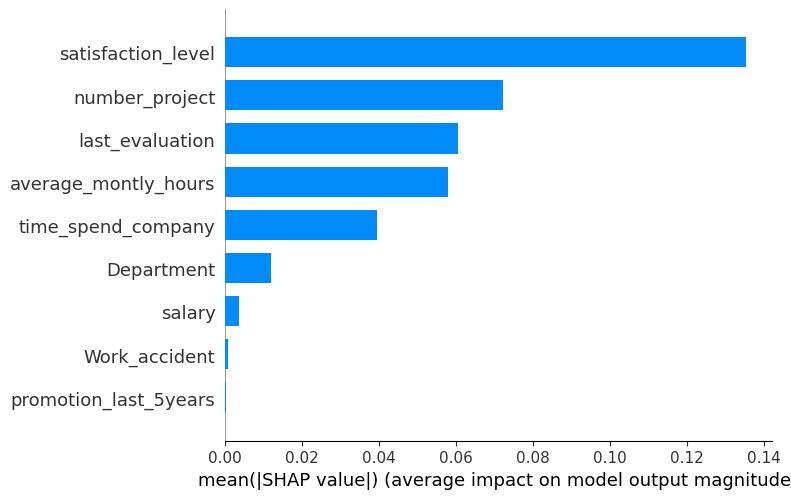

In [51]:
shap.summary_plot(tree_shap_value , X_test , X_test.columns , plot_type= 'bar')

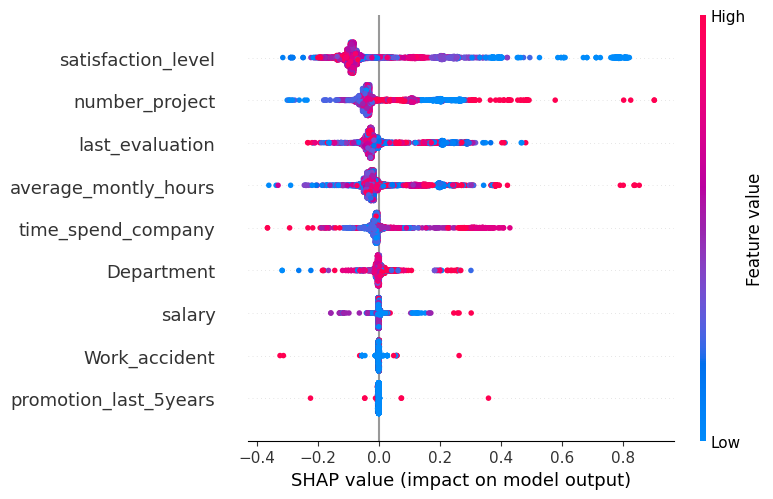

In [52]:
shap.summary_plot(tree_shap_value , X_test , X_test.columns)

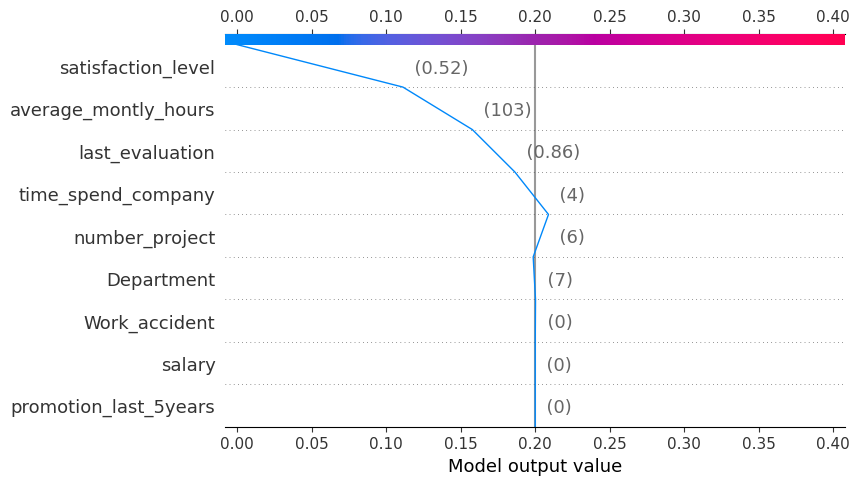

In [53]:
shap.decision_plot(tree_base_value , tree_shap_value[0] , X_test.iloc[0] , feature_names=X_test.columns.tolist())